In [1]:
import sys
import re, numpy as np, pandas as pd
from pprint import pprint
import seaborn as sns

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

#nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet


import pyLDAvis.gensim_models

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already

In [2]:
df = pd.read_csv('allstructuredtweets.csv', index_col=0)

In [3]:
cols = ['id', 'date', 'username', 'name', 'place', 'tweet', 'language', 'hashtags']

for col in df.columns:
  if col not in cols:
    df.drop(col, axis=1, inplace=True)
df.head()

,id,date,username,name,place,tweet,language,hashtags
0,1427294120360521728,2021-08-16,royalfreenhs,Royal Free London,NaN,We want RFL staff at each of our hospitals to ...,en,"['epr', 'freenet']"
1,1427283587536199683,2021-08-16,sarah_sauve,Sarah Sauvé,NaN,@NLZeroWaste has been working on this for a fe...,en,"['zerowaste', 'plasticpollution', 'brandaudit'..."
2,1427283232597417985,2021-08-16,sjcnl709,Social Justice Co-op NL,NaN,@NLZeroWaste has launched its 2021 Brand Audit...,en,"['zerowaste', 'plasticpollution', 'stopplastic..."
3,1427222591492722688,2021-08-16,jbvbin3t,Jean Babinet #noGreenwashing 💉💉,NaN,@buchebuche561 @ChSimonSU Ça fait longtemps qu...,fr,"['superphénix', 'epr']"
4,1427215153632849923,2021-08-16,circularaction,Circular Action Hub,NaN,Did you know that you can search for projects ...,en,"['csr', 'epr', 'greenfinance', 'circulareconom..."


In [4]:
df['language'] = df['language'].map(lambda x: re.sub('en', 'English', x))
df['language'] = df['language'].map(lambda x: re.sub('ar', 'Arabic', x))
df['language'] = df['language'].map(lambda x: re.sub('ca', 'Catalan', x))
df['language'] = df['language'].map(lambda x: re.sub('de', 'German', x))
df['language'] = df['language'].map(lambda x: re.sub('es', 'Spanish', x))
df['language'] = df['language'].map(lambda x: re.sub('fr', 'French', x))
df['language'] = df['language'].map(lambda x: re.sub('hi', 'Hindi', x))
df['language'] = df['language'].map(lambda x: re.sub('in', 'Indonesian', x))
df['language'] = df['language'].map(lambda x: re.sub('it', 'Italian', x))
df['language'] = df['language'].map(lambda x: re.sub('ja', 'Japanese', x))
df['language'] = df['language'].map(lambda x: re.sub('nl', 'Dutch', x))
df['language'] = df['language'].map(lambda x: re.sub('pl', 'Polish', x))
df['language'] = df['language'].map(lambda x: re.sub('pt', 'Portuguese', x))
df['language'] = df['language'].map(lambda x: re.sub('ro', 'Romanian', x))
df['language'] = df['language'].map(lambda x: re.sub('th', 'Thai', x))
df['language'] = df['language'].map(lambda x: re.sub('tl', 'Tagalog', x))
df['language'] = df['language'].map(lambda x: re.sub('tr', 'Turkish', x))

C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/438330873.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


<AxesSubplot:xlabel='language', ylabel='id'>

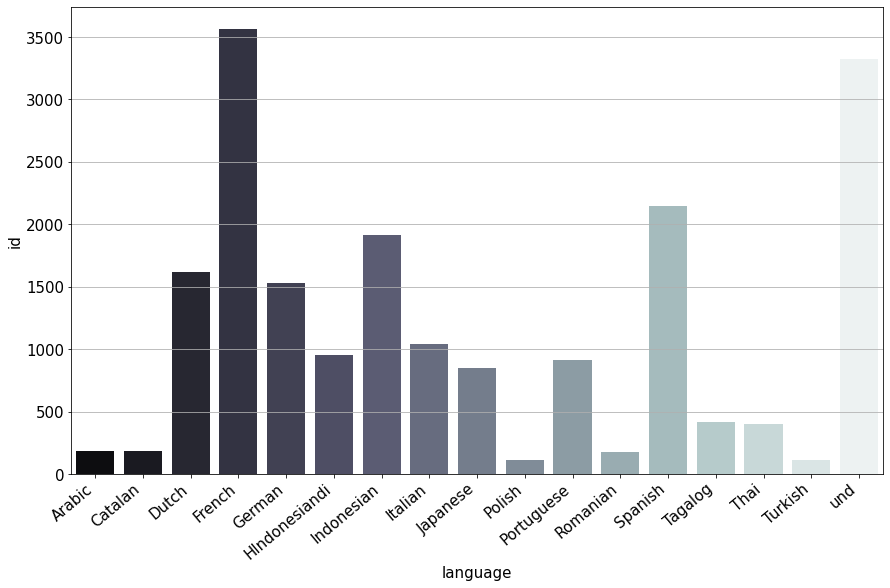

In [5]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_ylabel("Frequency", size = 15)
ax.set_xlabel("Language", size = 15)
ax.grid(axis='y')

x = pd.DataFrame(df[df['language'] != 'English'].groupby('language')['id'].count())
x = x.reset_index()
x = x[x['id']>=100]
sns.barplot(data=x, x=x.language, y=x.id, palette='bone')

In [6]:
df = df[df['language'] == 'English']
df.head()

,id,date,username,name,place,tweet,language,hashtags
0,1427294120360521728,2021-08-16,royalfreenhs,Royal Free London,NaN,We want RFL staff at each of our hospitals to ...,English,"['epr', 'freenet']"
1,1427283587536199683,2021-08-16,sarah_sauve,Sarah Sauvé,NaN,@NLZeroWaste has been working on this for a fe...,English,"['zerowaste', 'plasticpollution', 'brandaudit'..."
2,1427283232597417985,2021-08-16,sjcnl709,Social Justice Co-op NL,NaN,@NLZeroWaste has launched its 2021 Brand Audit...,English,"['zerowaste', 'plasticpollution', 'stopplastic..."
4,1427215153632849923,2021-08-16,circularaction,Circular Action Hub,NaN,Did you know that you can search for projects ...,English,"['csr', 'epr', 'greenfinance', 'circulareconom..."
5,1427208574766358533,2021-08-16,allscriptsuk,Allscripts UK,NaN,@WWLNHS have been able to set their sights on ...,English,['epr']


In [7]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,username,name,place,tweet,language,hashtags,year,month
0,1427294120360521728,2021-08-16,royalfreenhs,Royal Free London,NaN,We want RFL staff at each of our hospitals to ...,English,"['epr', 'freenet']",2021,8
1,1427283587536199683,2021-08-16,sarah_sauve,Sarah Sauvé,NaN,@NLZeroWaste has been working on this for a fe...,English,"['zerowaste', 'plasticpollution', 'brandaudit'...",2021,8
2,1427283232597417985,2021-08-16,sjcnl709,Social Justice Co-op NL,NaN,@NLZeroWaste has launched its 2021 Brand Audit...,English,"['zerowaste', 'plasticpollution', 'stopplastic...",2021,8
4,1427215153632849923,2021-08-16,circularaction,Circular Action Hub,NaN,Did you know that you can search for projects ...,English,"['csr', 'epr', 'greenfinance', 'circulareconom...",2021,8
5,1427208574766358533,2021-08-16,allscriptsuk,Allscripts UK,NaN,@WWLNHS have been able to set their sights on ...,English,['epr'],2021,8


<AxesSubplot:xlabel='Year', ylabel='Number of tweets'>

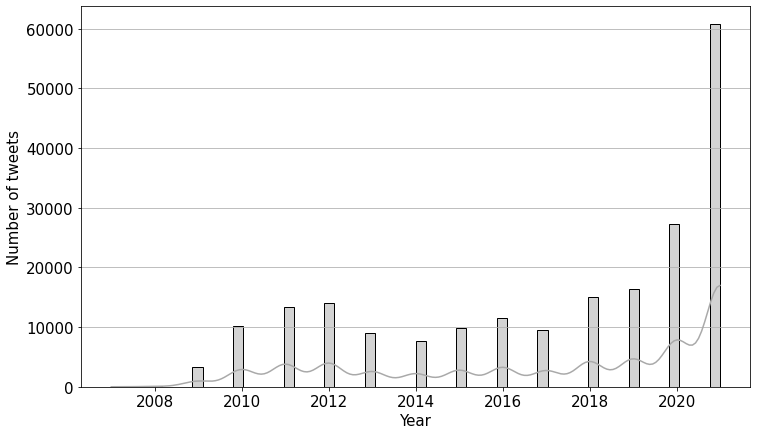

In [11]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)
ax.set_ylabel("Number of tweets", size = 15)
ax.set_xlabel("Year", size = 15)
ax.grid(axis='y')
sns.histplot(data=df['year'], color='darkgrey', kde=True)

In [12]:
df["hashtags"] = df["hashtags"].apply(eval)

In [13]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

hashtag_count = to_1D(df['hashtags']).value_counts()

In [14]:
hashtag_count = hashtag_count[hashtag_count >= 2000]
hashtag_count

weee                              16413
recycling                         13491
hazardouswaste                     9633
ewaste                             8526
epr                                7266
circulareconomy                    5966
recycle                            5898
electronicwaste                    3609
waste                              3499
sustainability                     3214
environment                        3066
extendedproducerresponsibility     2551
reuse                              2546
dtype: int64

In [15]:
ax.bar(hashtag_count.index,
        hashtag_count.values)
ax.set_ylabel("Frequency", size = 50)
ax.set_xlabel("Hashtags", size = 50)
ax.set_title("hashtags used in twitter", size = 14)
fig.autofmt_xdate()

In [16]:
df_freq = pd.read_csv('dig_freq.csv')
df_freq

,Keywords,Frequency
0,ewaste / e-waste,115438
1,recycling,91265
2,phone / cell phone,47793
3,extended producer responsibility / EPR,24492
4,disposal,11746
5,Program,11285
6,cost,11059
7,knowledge / education,8552
8,WEEE,7982
9,electronics,7619


<AxesSubplot:title={'center':'Most popular keywords\n\n'}, xlabel='Frequency', ylabel='Keywords'>

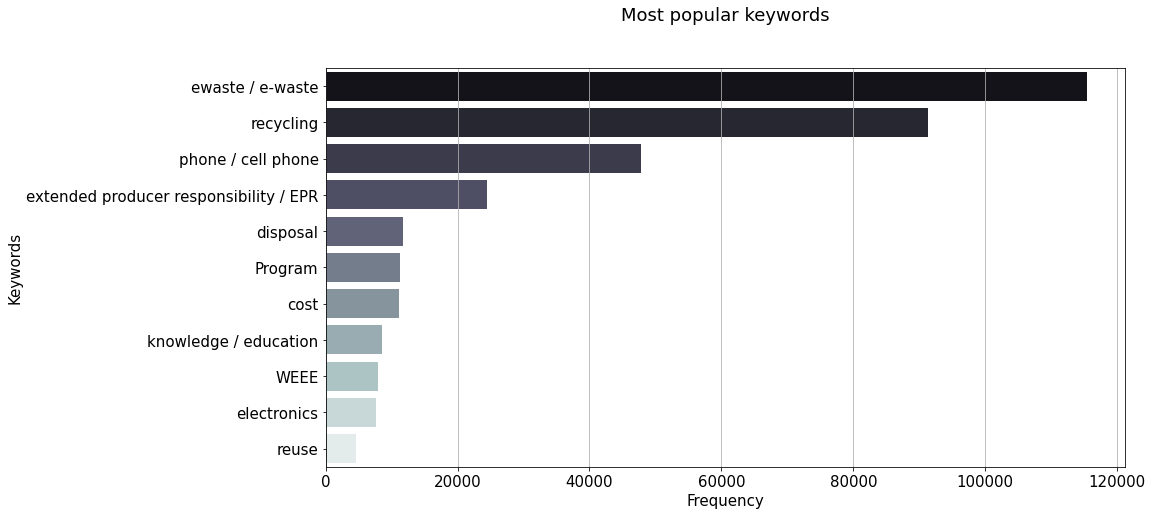

In [18]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Most popular keywords\n\n', size = 18)

plt.tight_layout()
ax.set_ylabel("Keywords\n\n", size = 15)
ax.set_xlabel("\n\nFrequency", size = 15)
ax.grid(axis='x')

sns.barplot(data=df_freq, y='Keywords', x='Frequency', palette='bone')

In [19]:
group_hash = df.groupby('year')['hashtags'].apply(lambda x: to_1D(x).value_counts())

C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/3712675676.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([x for _list in series for x in _list])


In [20]:
hashPerYear = pd.DataFrame(group_hash)
hashPerYear.reset_index(level=0, inplace=True)
hashPerYear.reset_index(level=0, inplace=True)
hashPerYear = hashPerYear.rename({'index': 'hashtag', 'hashtags': 'count'}, axis=1)
hashPerYear

,hashtag,year,count
0,china20,2008,1
1,news,2008,1
2,recycling,2009,41
3,green,2009,38
4,ewaste,2009,15
...,...,...,...
53123,omemeelionsclub,2021,1
53124,mexico,2021,1
53125,vimalpanmasala,2021,1
53126,paperchoice,2021,1


<AxesSubplot:title={'center':'Most popular hashtags\n\n'}, xlabel='Year', ylabel='Number of tweets\n\n'>

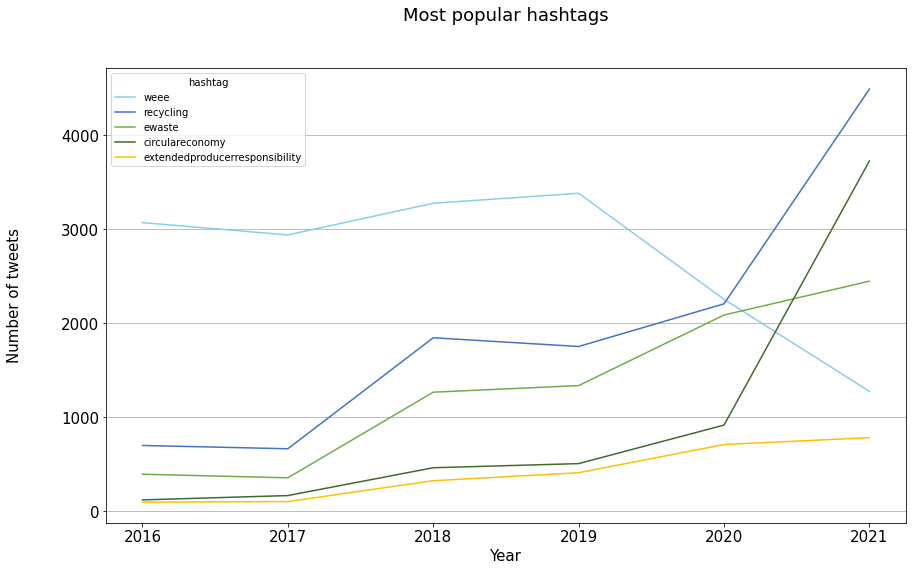

In [21]:
hash_plot = hashPerYear.loc[ (hashPerYear['hashtag'] == 'ewaste') | (hashPerYear['hashtag'] == 'recycling') | 
                              (hashPerYear['hashtag'] == 'extendedproducerresponsibility') | (hashPerYear['hashtag'] == 'recycling')
                                | (hashPerYear['hashtag'] == 'weee') | (hashPerYear['hashtag'] == 'circulareconomy')]

fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_ylabel("Number of tweets\n\n", size = 15)
ax.set_xlabel("Year", size = 15)
ax.set_title('Most popular hashtags\n\n', size = 18)
ax.grid(axis='y')
# ax.set_theme(style="dark")

# sns.set(rc={'figure.figsize':(12,7)})
# Plot the responses for different events and regions
sns.lineplot(x="year", y="count",
             hue="hashtag",
             #linestyle='dashed',
             data=hash_plot[hash_plot['year'] >= 2016],
             palette=['skyblue', '#4472c4', '#70ad47', '#43682b', '#ffc000']
             )


In [22]:
analyzer = SentimentIntensityAnalyzer()

# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [23]:

%%time

df['sentiment_neg'] = df['tweet'].apply(negative_score)
df['sentiment_neu'] = df['tweet'].apply(neutral_score)
df['sentiment_pos'] = df['tweet'].apply(positive_score)
df['sentiment_compound'] = df['tweet'].apply(compound_score)

Wall time: 2min 17s


Wall time: 146 ms


Text(0.5, 0.98, 'Sentiment Analysis of tweets\n\n')

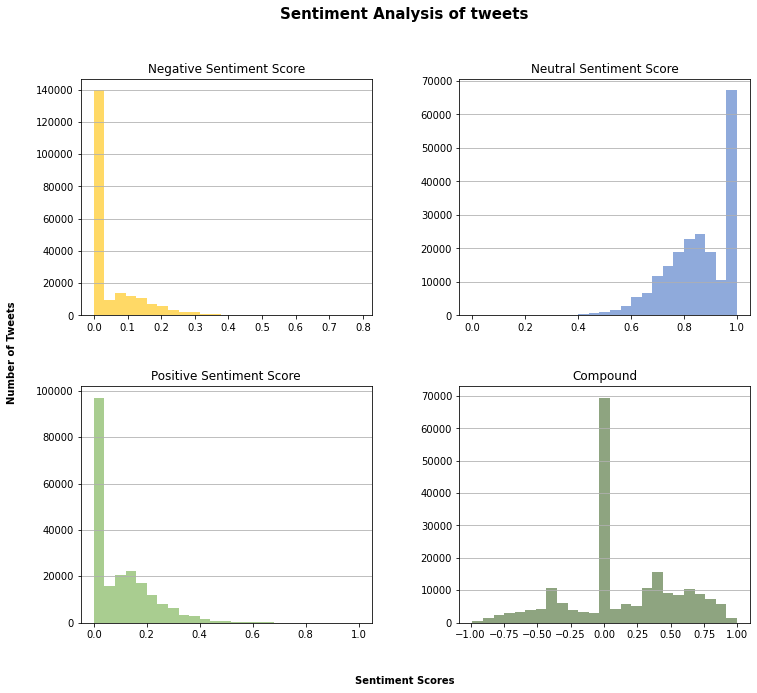

In [24]:
%%time

# all scores in 4 histograms
fig, axes = plt.subplots(2,2, figsize=(12,10))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='#ffc000', alpha=0.6)

axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='#4472c4', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='#70ad47', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='#43682b', alpha=0.6)
axes[1,1].set_title('Compound')

axes[0,0].grid(axis='x')
axes[0,1].grid(axis='x')
axes[1,0].grid(axis='x')
axes[1,1].grid(axis='x')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Tweets', fontweight='bold', va='center', rotation='vertical')


# plot title
plt.suptitle('Sentiment Analysis of tweets\n\n', fontsize=15, fontweight='bold')

In [25]:
def score(x):
    if x >= 0.25:
        return 'positive'
    elif x < -0.25:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_compound'].apply(lambda x: score(x))
df.head(4)

,id,date,username,name,place,tweet,language,hashtags,year,month,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,sentiment
0,1427294120360521728,2021-08-16,royalfreenhs,Royal Free London,NaN,We want RFL staff at each of our hospitals to ...,English,"[epr, freenet]",2021,8,0.000,0.926,0.074,0.3818,positive
1,1427283587536199683,2021-08-16,sarah_sauve,Sarah Sauvé,NaN,@NLZeroWaste has been working on this for a fe...,English,"[zerowaste, plasticpollution, brandaudit, epr,...",2021,8,0.063,0.778,0.159,0.5550,positive
2,1427283232597417985,2021-08-16,sjcnl709,Social Justice Co-op NL,NaN,@NLZeroWaste has launched its 2021 Brand Audit...,English,"[zerowaste, plasticpollution, stopplasticwaste...",2021,8,0.080,0.800,0.120,0.1260,neutral
4,1427215153632849923,2021-08-16,circularaction,Circular Action Hub,NaN,Did you know that you can search for projects ...,English,"[csr, epr, greenfinance, circulareconomy, sust...",2021,8,0.000,0.826,0.174,0.7783,positive


In [26]:
# Remove punctuation
df['preprocessed_tweet'] = df['tweet'].map(lambda x: re.sub('[\!?()#&@]', '', x))
df['preprocessed_tweet'] = df['tweet'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
df['preprocessed_tweet'] = df['tweet'].map(lambda x: re.sub('\s+', ' ', x))  # remove newline chars
# Convert to lowercase
df['preprocessed_tweet'] = df['preprocessed_tweet'].map(lambda x: x.lower())
#removing urls
df['preprocessed_tweet'] = df['preprocessed_tweet'].map(lambda x: re.sub('https?:\/\/.*[\r\n]*', '', x))
df['preprocessed_tweet'] = df['preprocessed_tweet'].map(lambda x: re.sub('www.*[\r\n]*', '', x))
# Print out the first rows of tweets
df['preprocessed_tweet'].head()

<>:2: DeprecationWarning: invalid escape sequence \!
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \/
<>:2: DeprecationWarning: invalid escape sequence \!
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \/
C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/1030708571.py:2: DeprecationWarning: invalid escape sequence \!
  df['preprocessed_tweet'] = df['tweet'].map(lambda x: re.sub('[\!?()#&@]', '', x))
C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/1030708571.py:3: DeprecationWarning: invalid escape sequence \S
  df['preprocessed_tweet'] = df['tweet'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/1030708571.py:4: DeprecationWarning: invalid escape sequence \s
  df['preprocessed_tweet'] = df['tweet'].map(lambda 

0    we want rfl staff at each of our hospitals to ...
1    @nlzerowaste has been working on this for a fe...
2    @nlzerowaste has launched its 2021 brand audit...
4    did you know that you can search for projects ...
5    @wwlnhs have been able to set their sights on ...
Name: preprocessed_tweet, dtype: object

In [27]:
#removing stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
                    'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
                    'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
                    'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def sent_to_words(sentences):
    for sentence in sentences:
        # sentence = re.sub('\S*@\S*\s?', '', sentence)  # remove emails
        # sentence = re.sub('\s+', ' ', sentence)  # remove newline chars
        # sentence = re.sub("\'", "", sentence)  # remove single quotes
        # these have been applied in previuos steps

        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.preprocessed_tweet.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
# data_words = remove_stopwords(data_words)
# # print(data_words[:1][0][:30])
print(data_words[:1])

[['we', 'want', 'rfl', 'staff', 'at', 'each', 'of', 'our', 'hospitals', 'to', 'get', 'involved', 'in', 'epr', 'training', 'whichever', 'site', 'you', 're', 'based', 'at', 'if', 'you', 'll', 'be', 'using', 'the', 'electronic', 'patient', 'record', 'epr', 'please', 'check', 'and', 'review', 'your', 'training', 'today', 'you', 'can', 'find', 'all', 'the', 'details', 'you', 'need', 'on', 'freenet']]


In [28]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


Wall time: 6min 27s


In [31]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           iterations=3000,
                                        #    random_state=100,
                                        #    update_every=1,
                                        #    chunksize=10,
                                        #    passes=10,
                                        #    alpha='symmetric',
                                        #    per_word_topics=True
                                            )

print(lda_model.print_topics())

[(0, '0.087*"iphone" + 0.048*"apple" + 0.045*"recycling" + 0.029*"new" + 0.018*"ambitious" + 0.018*"directive" + 0.017*"phone" + 0.014*"device" + 0.010*"mobile" + 0.008*"price"'), (1, '0.102*"waste" + 0.096*"weee" + 0.080*"electronic" + 0.070*"electrical" + 0.069*"equipment" + 0.032*"recycle" + 0.030*"recycling" + 0.023*"old" + 0.016*"disposal" + 0.011*"material"'), (2, '0.065*"program" + 0.019*"webinar" + 0.019*"recycling" + 0.016*"register" + 0.016*"launch" + 0.016*"recovery" + 0.013*"link" + 0.013*"expand" + 0.012*"metal" + 0.012*"asset"'), (3, '0.016*"thing" + 0.013*"give" + 0.013*"really" + 0.011*"time" + 0.011*"people" + 0.010*"still" + 0.009*"well" + 0.008*"case" + 0.008*"ever" + 0.008*"much"'), (4, '0.024*"recycling" + 0.018*"year" + 0.015*"great" + 0.012*"love" + 0.010*"today" + 0.009*"work" + 0.009*"last" + 0.008*"stand" + 0.008*"job" + 0.008*"consultation"'), (5, '0.068*"recycling" + 0.047*"recycle" + 0.026*"mobile" + 0.018*"free" + 0.016*"phone" + 0.015*"today" + 0.014*"vot

In [32]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str('9_tweet'))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str('9_tweet') +'.html')
LDAvis_prepared

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.222227 -0.007457       1        1  23.689789
5     -0.070952 -0.033811       2        1  22.103212
1     -0.274990  0.056504       3        1  19.132627
0      0.082737  0.039468       4        1   9.793750
4      0.142201 -0.029841       5        1   9.781729
3      0.143287 -0.307660       6        1   9.388900
2      0.199944  0.282797       7        1   6.109993, topic_info=                Term          Freq         Total Category  logprob  loglift
115         producer  46415.000000  46415.000000  Default  30.0000  30.0000
142   responsibility  44756.000000  44756.000000  Default  29.0000  29.0000
1570            weee  38225.000000  38225.000000  Default  28.0000  28.0000
108            waste  56197.000000  56197.000000  Default  27.0000  27.0000
3         electronic  32123.000000  32123.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
189            click   1467.878730   1617.989104   Topic7  -4.4455   2.6979
3949             box   1057.442757   1607.152396   Topic7  -4.7735   2.3766
116        recycling   2336.004216  65579.143752   Topic7  -3.9809  -0.5396
139             full    717.811698   2266.632243   Topic7  -5.1609   1.6454
64             watch    651.059183   1735.171187   Topic7  -5.2585   1.8150

[426 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4471      4  0.998501  accept
246       6  0.998885     act
7924      1  0.998408      ad
997       7  0.999148     add
239       1  0.998282   adopt
...     ...       ...     ...
187       3  0.147757    year
187       4  0.046358    year
187       5  0.592830    year
187       6  0.005897    year
187       7  0.000164    year

[866 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 1, 5, 4, 3])

In [ ]:
# # Save LDA model to disk
# path_to_model = "./results/lda_9_tweet.model"
# lda_model.save(path_to_model)

In [34]:
%%time

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Wall time: 21min 9s


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.4066,"recycling, recycle, mobile, free, phone, today...","[rfl, staff, hospital, involve, epr, training,..."
1,1,6.0,0.5532,"producer, responsibility, extended, extend, wa...","[nlzerowaste, working, week, launch, brand_aud..."
2,2,6.0,0.3546,"producer, responsibility, extended, extend, wa...","[launch, brand_audit, check, thread, detail, o..."
3,3,1.0,0.5407,"waste, weee, electronic, electrical, equipment...","[search, project, support, different, criterio..."
4,4,4.0,0.4134,"recycling, year, great, love, today, work, las...","[wwlnhs, able, set, sight, himss, create, heal..."
5,5,6.0,0.3292,"producer, responsibility, extended, extend, wa...","[integrate, care, system, work, together, depl..."
6,6,6.0,0.4679,"producer, responsibility, extended, extend, wa...","[quick, access, patient_record, improve, avail..."
7,7,6.0,0.4992,"producer, responsibility, extended, extend, wa...","[really, great, article, forbe, future, platfo..."
8,8,6.0,0.8040,"producer, responsibility, extended, extend, wa...","[epr, packaging, law, effective, way, address,..."
9,9,6.0,0.8075,"producer, responsibility, extended, extend, wa...","[excellent, summary, regard, lie, plastic, rec..."


In [35]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9340,"iphone, apple, recycling, new, ambitious, directive, phone, device, mobile, price","[check, listen, apple, iphone, sustainability, apple, technology, technew, podcast, tech, iphone..."
1,1.0,0.9615,"waste, weee, electronic, electrical, equipment, recycle, recycling, old, disposal, material","[open, world, large, waste, recycling, hub, dubaiindpark, sqft, recycling, plant, process, weee,..."
2,2.0,0.8934,"program, webinar, recycling, register, launch, recovery, link, expand, metal, asset","[register, join, part, workshop, theme, structure, forthcoming, ester]"
3,3.0,0.8925,"thing, give, really, time, people, still, well, case, ever, much","[give, great, relief, deal, professional, care, itdisposal]"
4,4.0,0.9157,"recycling, year, great, love, today, work, last, stand, job, consultation","[silvertraine, great, meeting, today, load, plenty, opportunity, itdisposal, technology, digital..."
5,5.0,0.9548,"recycling, recycle, mobile, free, phone, today, vote, day, collection, refurbish","[recycle, help, help, help, help, help, help, help, help, help, help, help, help, help, help, he..."
6,6.0,0.9632,"producer, responsibility, extended, extend, waste, plastic, packaging, recycling, recycle, epr","[action, green, rule, extend, producer, responsibility, plastic, waste, management, rule, defcco..."


In [ ]:
# lda_model.save("E:\\Media, Docs & Programs\\Uni\\Master's\\Article\\Analysis\\Phasell\\Code\\lda.model")

In [68]:
df = df.reset_index()
results = pd.concat([df, df_dominant_topic], axis=1)
results = results.drop('index', 1)
results.head(1)

C:\Users\Soroush\AppData\Local\Temp/ipykernel_11916/2548678749.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  results = results.drop('index', 1)


,id,date,username,name,place,tweet,language,hashtags,year,month,...,sentiment_neu,sentiment_pos,sentiment_compound,sentiment,preprocessed_tweet,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,1427294120360521728,2021-08-16,royalfreenhs,Royal Free London,NaN,We want RFL staff at each of our hospitals to get involved in EPR training. Whichever site you...,English,"[epr, freenet]",2021,8,...,0.926,0.074,0.3818,positive,we want rfl staff at each of our hospitals to get involved in epr training. whichever site you'r...,0,5.0,0.4066,"recycling, recycle, mobile, free, phone, today, vote, day, collection, refurbish","[rfl, staff, hospital, involve, epr, training, site, base, electronic, patient_record, epr, chec..."


In [55]:
# results.to_csv('tweet_and_topics_together.csv')

In [69]:
topic_counts = results.groupby('Dominant_Topic')['tweet'].count()

<AxesSubplot:title={'center':'Frequency of topics between tweets\n\n'}, xlabel='Dominant_Topic', ylabel='tweet'>

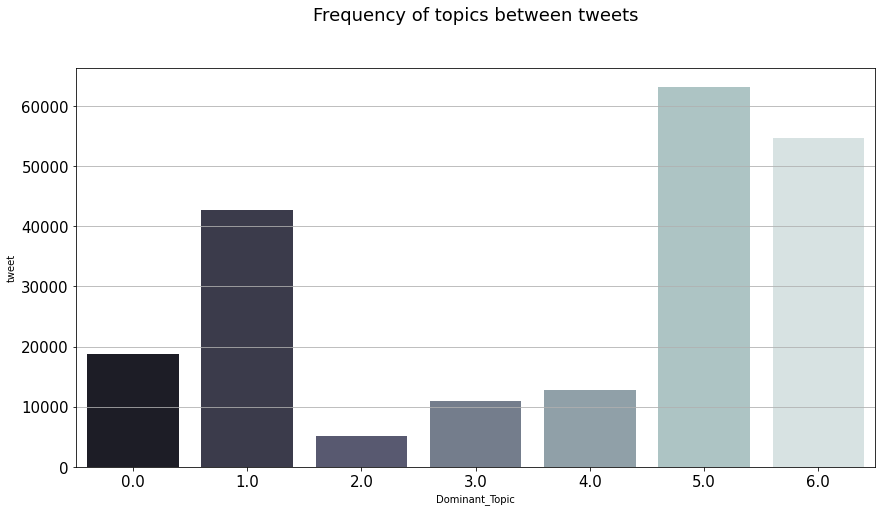

In [71]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between tweets\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')

# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=pd.DataFrame(topic_counts).reset_index(), x='Dominant_Topic', y='tweet', palette='bone')

In [72]:
topic_sentiment_counts = results.groupby(['Dominant_Topic', 'sentiment'])['tweet'].count()

<AxesSubplot:title={'center':'Frequency of topics between tweets\n\n'}, xlabel='Dominant_Topic', ylabel='tweet'>

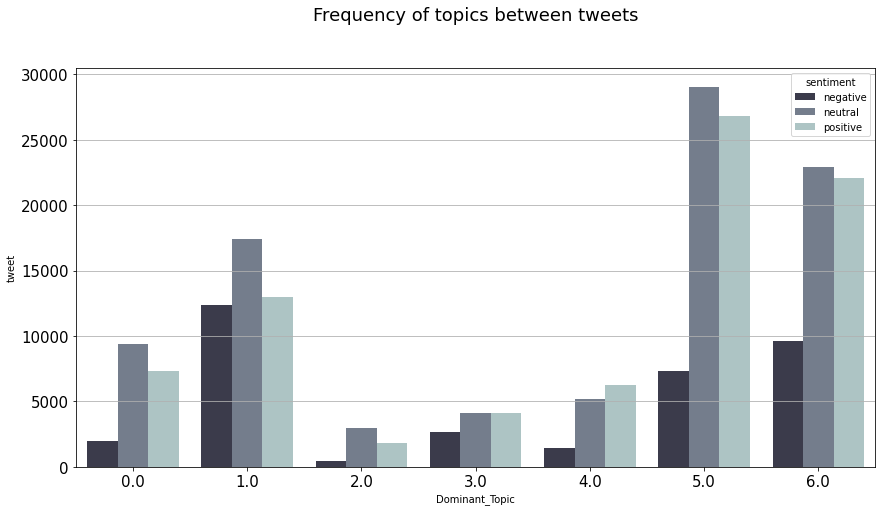

In [73]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between tweets\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')

# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=pd.DataFrame(topic_sentiment_counts).reset_index(), 
                        x='Dominant_Topic', y='tweet', color='blue', hue='sentiment', palette='bone')